<h2>DL Group 10</h2>


<table>
  <tr>
    <th>Student Name</th>
    <th>BITS ID</th>
    <th>Contribution</th>
  </tr>
  <tr>
    <td>ADITYA NANDAN REDDY SANIVARAPU</td>
    <td>2022dc04019</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>SANJANA SANJEEV DESHPANDE</td>
    <td>2022dc04091</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>DINESH KUMAR NAYAK</td>
    <td>2022da04293</td>
    <td>100%</td>
  </tr>
</table>



## Journal used for the implemetation

### Journal title: Deep Learning in Medical Ultrasound Image Analysis: A Review

Authors: YU WANG, XINKE GE, HE MA, SHOULIANG QI, GUANJING ZHANG, AND YUDONG YAO

Journal Name:Deep Learning in Medical Ultrasound Image Analysis

Year:2021

# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image
import shutil

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import random
from sklearn.model_selection import train_test_split

import torch.optim as optim
from torch.optim import lr_scheduler
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
from torchvision.transforms import RandomHorizontalFlip, RandomRotation, ColorJitter
import warnings

def suppress_warnings():
    """
    Suppress DeprecationWarning,UserWarning.
    """
    warnings.filterwarnings("ignore", category=DeprecationWarning) # Suppress Deprecati
    warnings.filterwarnings("ignore", category=UserWarning) # Suppress UserWarni
    warnings.filterwarnings("ignore", category=FutureWarning)
    # Suppress UserWarning for outdated numexpr and bottleneck versions
    warnings.filterwarnings('ignore', message="Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).", category=UserWarning)
    warnings.filterwarnings('ignore', message="Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).", category=UserWarning)

    
suppress_warnings()


C:\Users\kanag\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\kanag\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



# DataSet URL 
### https://scholar.cu.edu.eg/Dataset_BUSI.zip


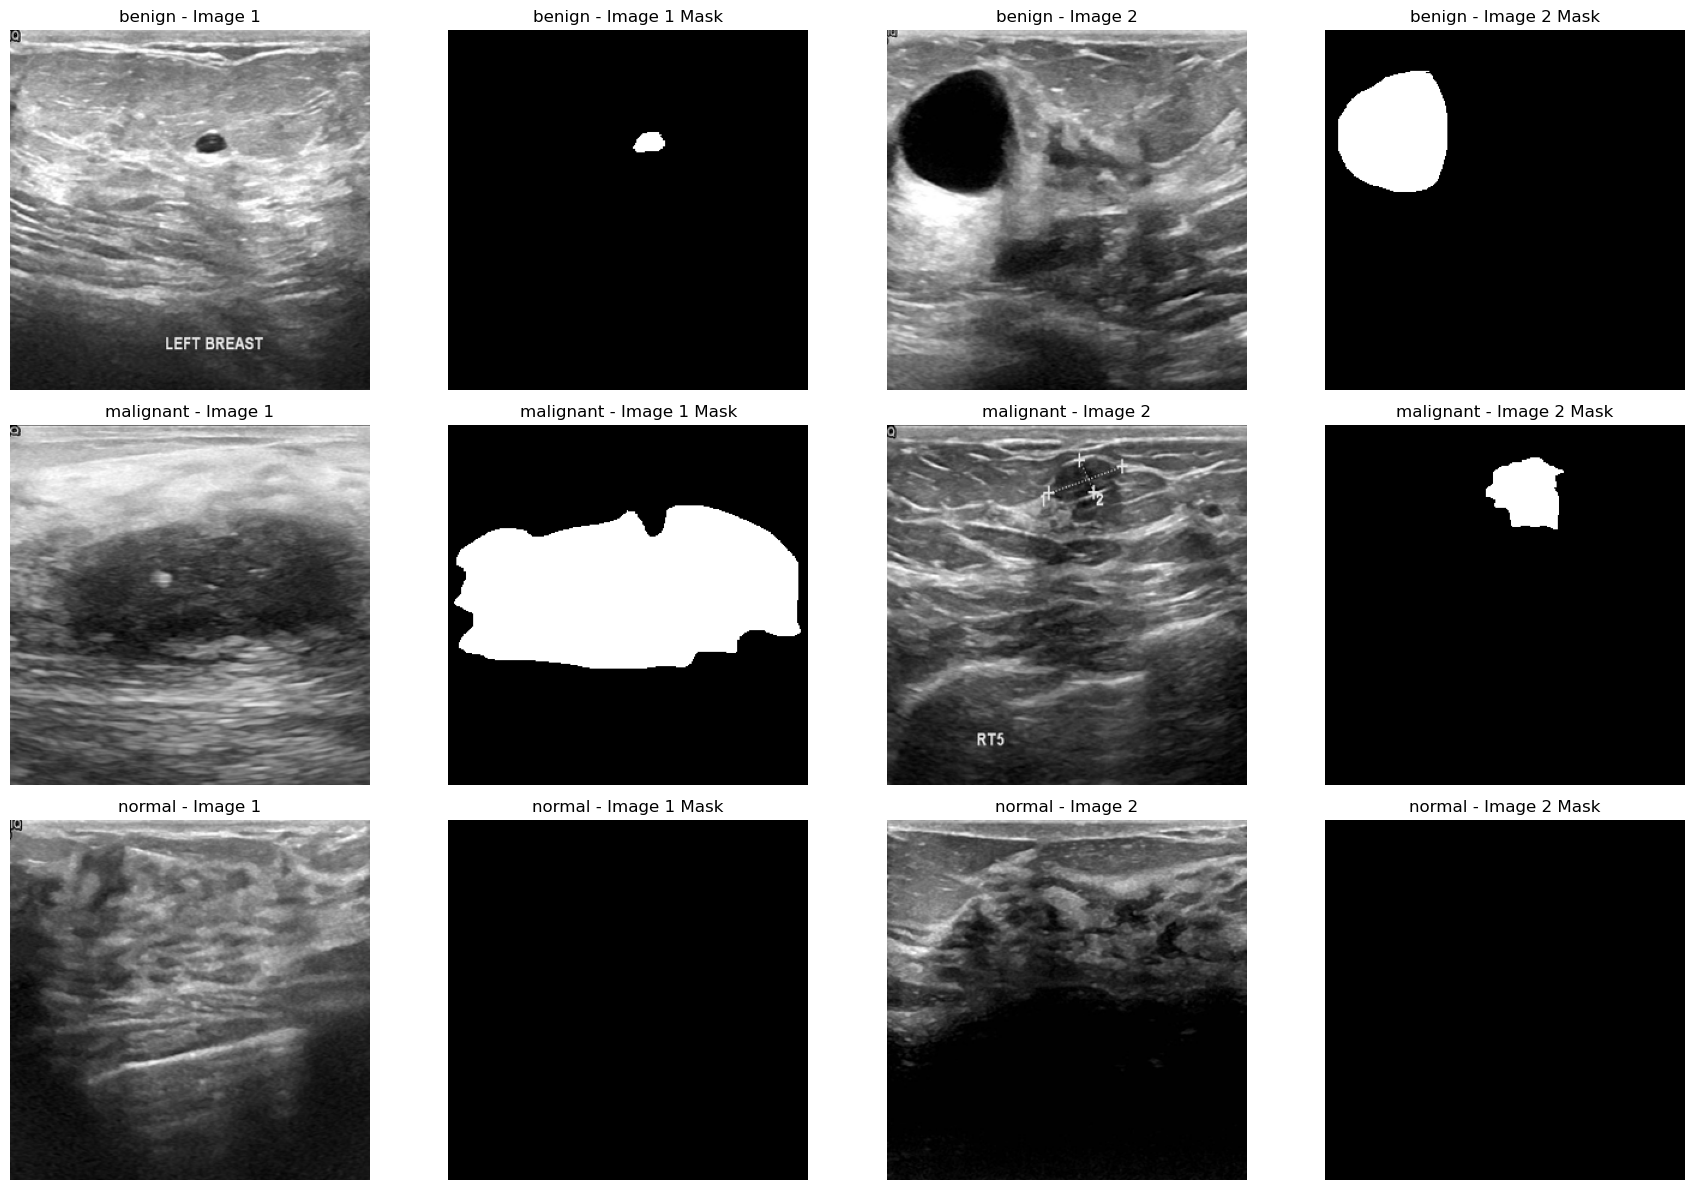

In [2]:
import os
import zipfile
from PIL import Image
import matplotlib.pyplot as plt

def load_images(data_dir, labels):
    fig, axs = plt.subplots(len(labels), 4, figsize=(18, 12))
    desired_width, desired_height = 300, 300

    for i, label in enumerate(labels):
        label_dir = os.path.join(data_dir, label)
        image_files = sorted([file for file in os.listdir(label_dir) if file.endswith('.png')])

        for j, image_file in enumerate(image_files[:4]):
            image_path = os.path.join(label_dir, image_file)
            image = Image.open(image_path).resize((desired_width, desired_height), Image.ANTIALIAS)
            image_label = f'{label} - Image {j // 2 + 1}' if j % 2 == 0 else f'{label} - Image {j // 2 + 1} Mask'

            axs[i, j].imshow(image)
            axs[i, j].set_title(image_label)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

img_labels = ['benign', 'malignant', 'normal']

# Define the path to the extracted dataset
data_dir = 'C:/Users/kanag/Downloads/Dataset_BUSI/Dataset_BUSI_with_GT'

# Load and display the images
load_images(data_dir, img_labels)


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

### Identify the target variables.

In [3]:
## Identify the target variables.
# Define target names
target_names = ['benign', 'malignant', 'normal'] # used for model classification
print(target_names)

['benign', 'malignant', 'normal']


### Data Preprocessing ( Apply preprocessing techniques suggested in journal for image enhancement histogram equalization and blending with mask files to the actual image for improved edge detection)

In [4]:
import os
from PIL import Image
from skimage.restoration import denoise_nl_means
import cv2
from PIL import Image
import numpy as np

preprocess_output_dir = 'C:/Users/kanag/Downloads/ImagePreProcessing/'

labels = target_names

for label in labels:
    os.makedirs(os.path.join(preprocess_output_dir, label), exist_ok=True)

def preprocess_images(image_path, mask_path, output_path):
    try:
        if os.path.exists(image_path) and os.path.exists(mask_path):
            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.mode != mask.mode:
                mask = mask.convert(image.mode)

            if image.size != mask.size:
                image = image.resize(mask.size)
        
            # blend the actual image and mask file.
            image_mask_blend = Image.blend(image, mask, alpha=0.5)
            
            # Convert the PIL image to a NumPy array
            enhanced_image_np = np.array(image_mask_blend)

            # Convert the image from RGB to grayscale if necessary
            if len(enhanced_image_np.shape) == 3:
                enhanced_image_np = cv2.cvtColor(enhanced_image_np, cv2.COLOR_RGB2GRAY)

            # Apply histogram equalization using OpenCV
            enhanced_image_equalized = cv2.equalizeHist(enhanced_image_np)

            # Convert the equalized image back to PIL format
            enhanced_image_equalized_pil = Image.fromarray(enhanced_image_equalized)

            label = os.path.basename(os.path.dirname(image_path))
            output_path = os.path.join(preprocess_output_dir, label, os.path.basename(image_path))
            #image_mask_blend.save(output_path)
            enhanced_image_equalized_pil.save(output_path)     
        else:
            pass
    except Exception as e:
        print(f"An error occurred for: {image_path} or {mask_path}. Error: {str(e)}")

for label in labels:
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for image_filename in os.listdir(label_dir):
            if image_filename.endswith('.png'):
                image_path = os.path.join(label_dir, image_filename)
                mask_filename = image_filename.replace('.png', '_mask.png')
                mask_path = os.path.join(label_dir, mask_filename)
                preprocess_images(image_path, mask_path, preprocess_output_dir)

print("PreProcessed images have been saved to",preprocess_output_dir)

PreProcessed images have been saved to C:/Users/kanag/Downloads/ImagePreProcessing/


### Display Preprocessed images

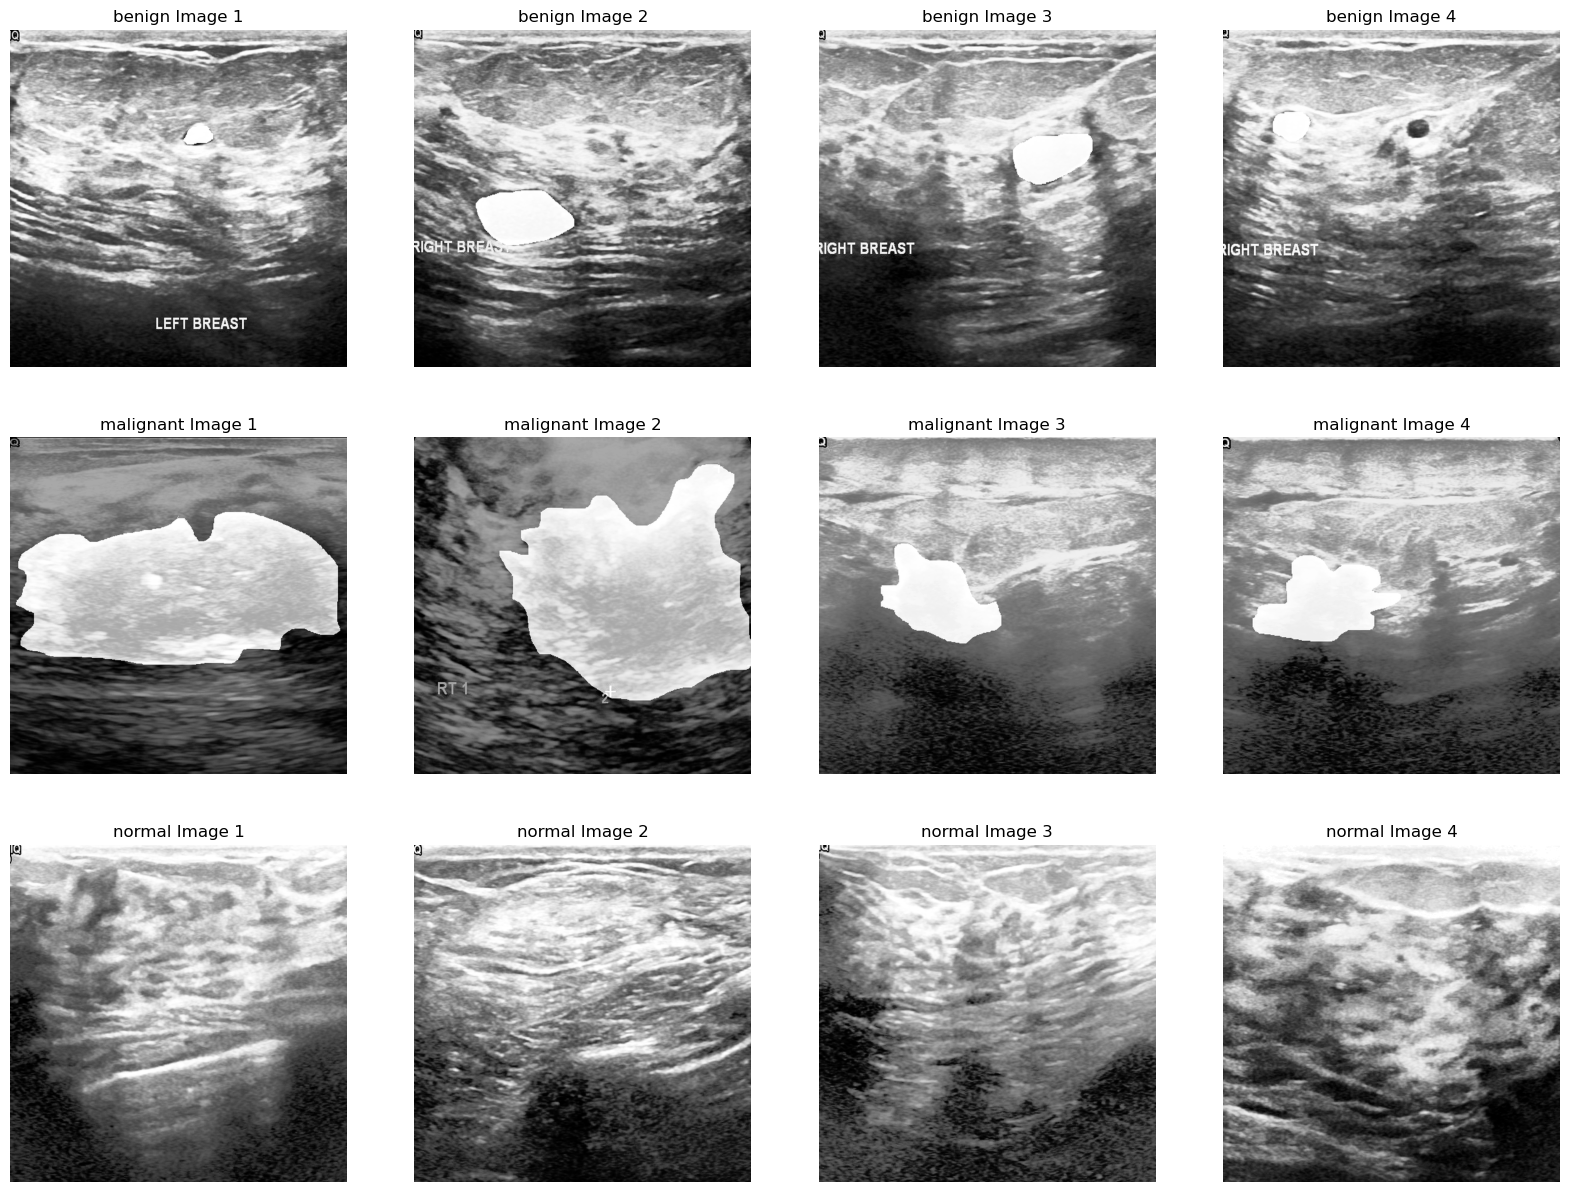

In [5]:
labels = ['benign', 'malignant', 'normal']
label_dirs = [os.path.join(preprocess_output_dir, label) for label in labels]

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

desired_width = 800
desired_height = 800

for i, label_dir in enumerate(label_dirs):
    images = [image for image in os.listdir(label_dir) if image.endswith('.png')]
    images.sort(key=lambda x: int(x.split('(')[1].split(')')[0]))

    for j, image_filename in enumerate(images[:4]):
        image_path = os.path.join(label_dir, image_filename)
        image = Image.open(image_path)

        image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].set_title(f'{labels[i]} Image {j + 1}')
        axs[i, j].axis('off')

plt.show()

### Split the data into training set and testing set

In [7]:
# Get file paths and labels (ignores the mask images)
file_paths = []
labels = []
data_dir = preprocess_output_dir

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            if image_file.endswith('.png') and not (image_file.endswith('_mask.png') or
                                                     image_file.endswith('_mask_1.png') or
                                                     image_file.endswith('_mask_2.png')):
                image_path = os.path.join(label_dir, image_file)
                labels.append(label)
                file_paths.append(image_path)

# Create DataFrame
data = pd.DataFrame({'Image_Path': file_paths, 'Label': labels})

## Split the data into training set and testing set
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42, stratify=data['Label'])
train_data, val_data = train_test_split(train_data, test_size=0.15, random_state=42, stratify=train_data['Label'])

print("Train Data Count:", len(train_data))
print("Test Data Count:", len(test_data))
print("Validation Data Count:", len(val_data))


Train Data Count: 563
Test Data Count: 117
Validation Data Count: 100


### Create Directory paths for train, validation, and test sets

In [8]:
# Directory paths for train, validation, and test sets
train_dir = 'C:/Users/kanag/Downloads/GoogleNet/train'
val_dir = 'C:/Users/kanag/Downloads/GoogleNet/validation'
test_dir = 'C:/Users/kanag/Downloads/GoogleNet/test'

# Create directories for each label in train, validation, and test directories
for label in labels:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Copy images from train_data DataFrame to train directory
for _, row in train_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(train_dir, label))

# Copy images from val_data DataFrame to validation directory
for _, row in val_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(val_dir, label))

# Copy images from test_data DataFrame to test directory
for _, row in test_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(test_dir, label))

def count_files(directory):
    subdirectories = ['benign', 'malignant', 'normal']
    file_counts = {}

    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(directory, subdirectory)
        if os.path.exists(subdirectory_path):
            file_count = len(os.listdir(subdirectory_path))
            file_counts[subdirectory] = file_count

    return file_counts

# Train directory
train_file_counts = count_files(train_dir)
print("Train Number Of Files :")
for category, count in train_file_counts.items():
    print(f"{category}: {count}")

# Validation directory
validation_file_counts = count_files(val_dir)
print("\nValidation Number Of Files:")
for category, count in validation_file_counts.items():
    print(f"{category}: {count}")

# Test directory
test_file_counts = count_files(test_dir)
print("\nTest Number Of Files:")
for category, count in test_file_counts.items():
    print(f"{category}: {count}")


Train Number Of Files :
benign: 315
malignant: 152
normal: 96

Validation Number Of Files:
benign: 56
malignant: 27
normal: 17

Test Number Of Files:
benign: 66
malignant: 31
normal: 20


In [9]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets, models, transforms

# Assuming you have training and validation datasets
# Applying common data augmentation tecniques.
# Define the transformations for the images
transform = transforms.Compose([
    transforms.Resize(224),  # Resize the image to 224x224
    transforms.CenterCrop(224),  # Crop the center of the image
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Load the training and validation datasets
train_dataset = ImageFolder(train_dir, transform=transform)
val_dataset = ImageFolder(val_dir, transform=transform)
test_dataset = ImageFolder(test_dir, transform=transform)


# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


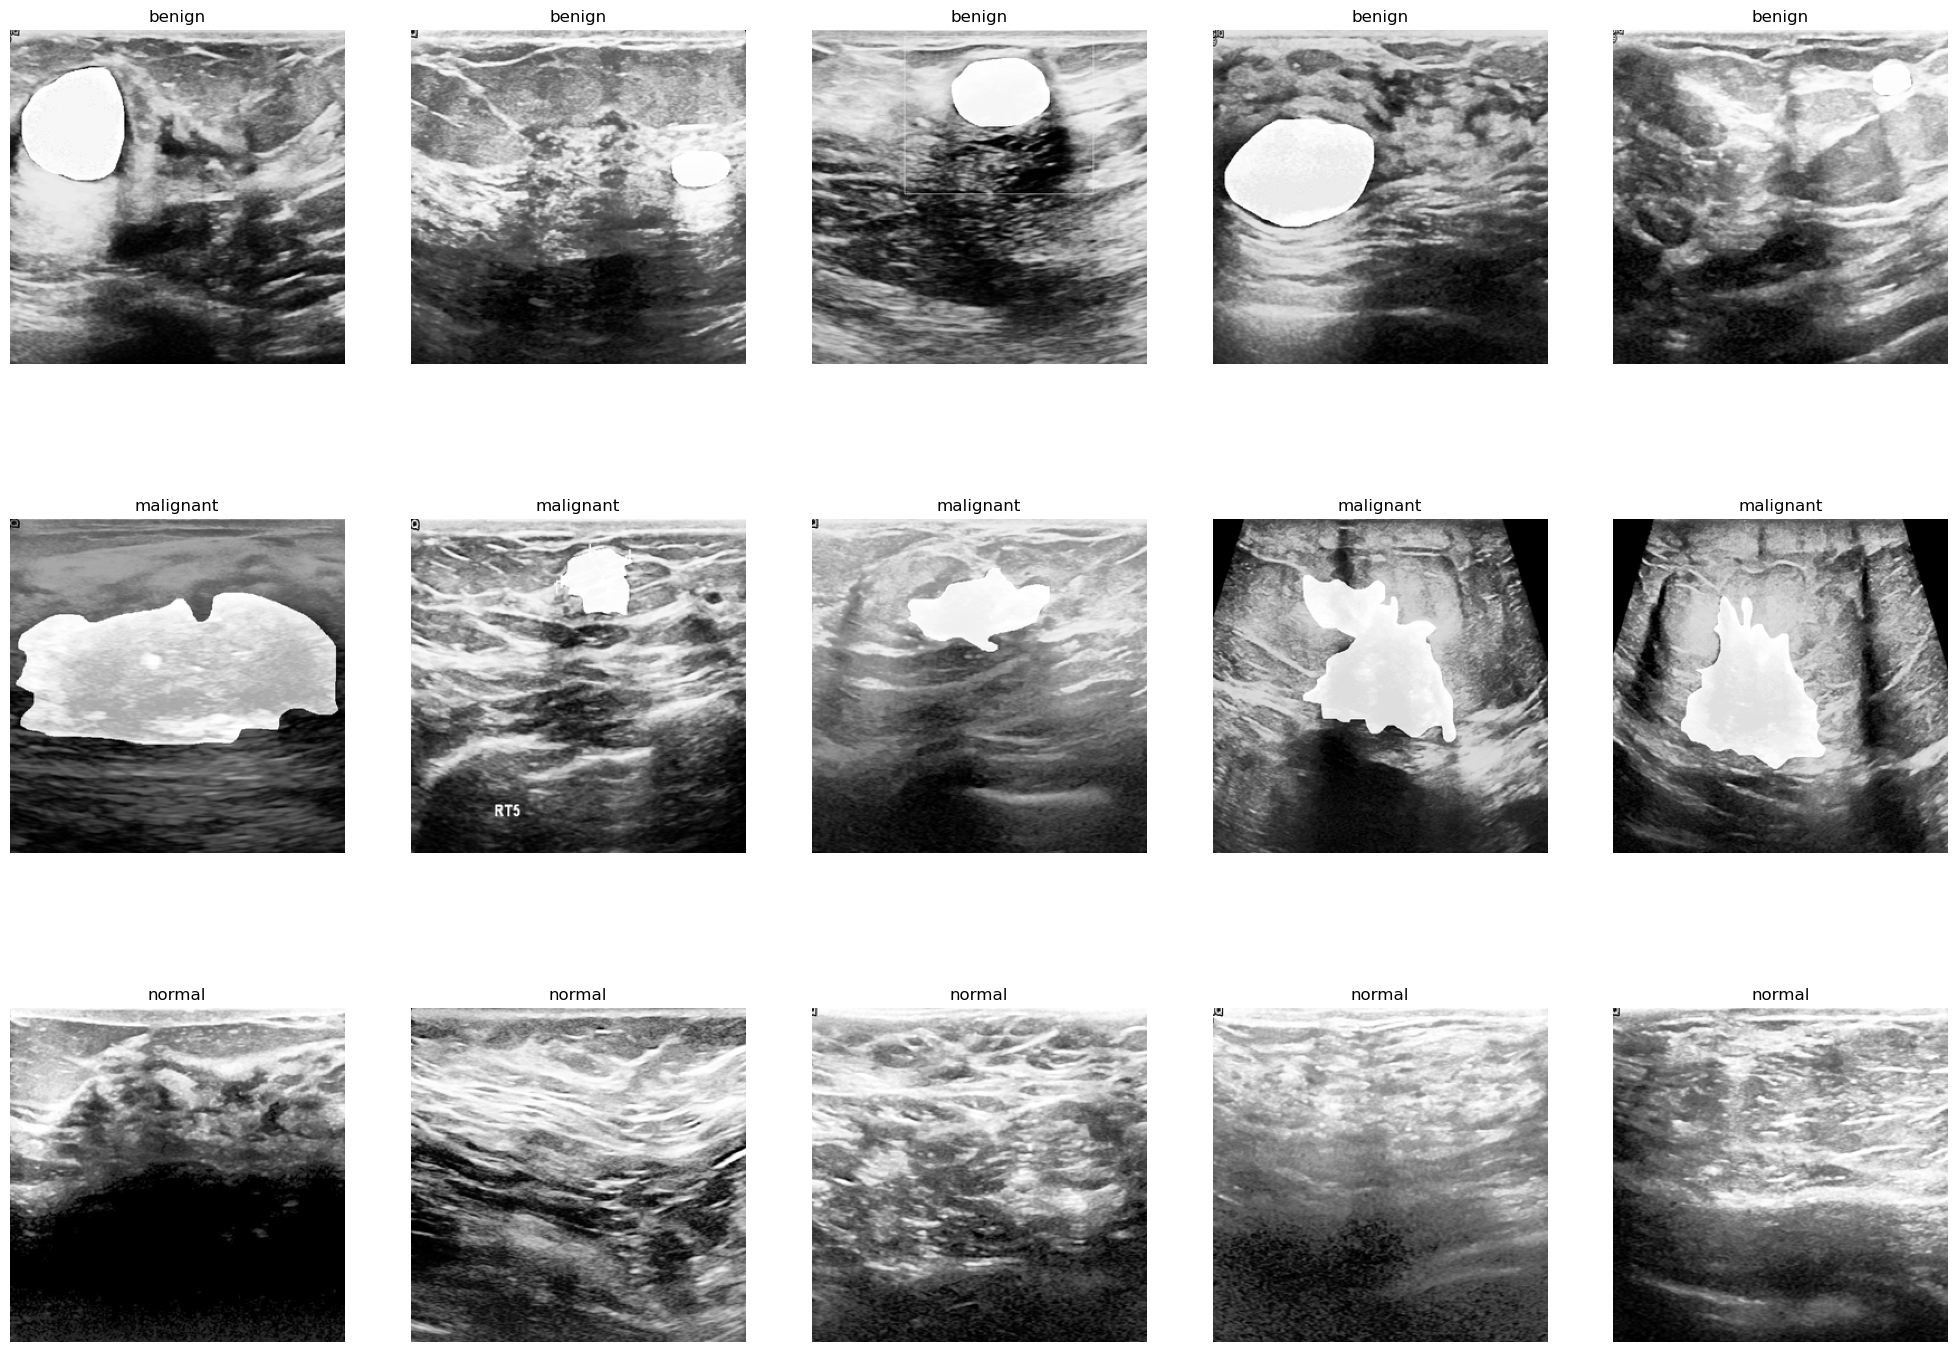

In [10]:
# Plot sample images
def plot_sample_images(label_dirs):
    fig, axs = plt.subplots(3, 5, figsize=(25, 18))
    desired_width = 300
    desired_height = 300

    for i, label_dir in enumerate(label_dirs):
        images = [image for image in os.listdir(label_dir) if not image.endswith('_mask.png')][:5]

        for j, image_filename in enumerate(images):
            image_path = os.path.join(label_dir, image_filename)
            image = Image.open(image_path)            
            image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            axs[i, j].imshow(image, cmap='gray')
            axs[i, j].set_title(img_labels[i])
            axs[i, j].axis('off')

# Plot sample images
labels = ['benign', 'malignant', 'normal']
label_dirs = [os.path.join(train_dir, label) for label in labels]
plot_sample_images(label_dirs)



## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using




### We have used  convolutional neural network (CNN) architecture for classification task using GoogleNet model as mentioned in the paper.

# CNN Architecture for Classification Model

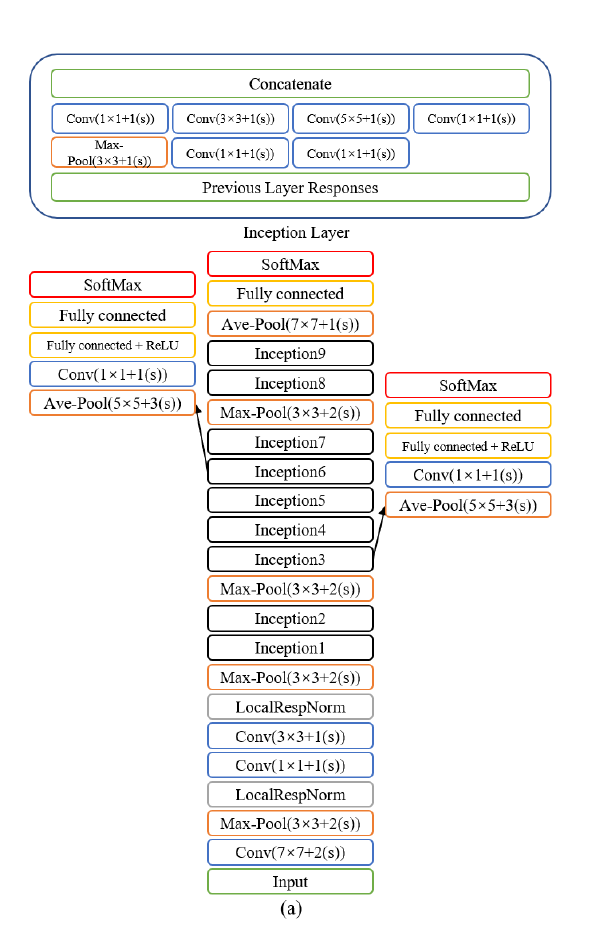

In [11]:
##---------Type the code below this line------------------##

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



### GoogleNet (Inception v1) Report

#### 1. Number of Layers

GoogleNet (Inception v1) consists of multiple layers, including convolutional layers, pooling layers, Inception modules, and fully connected layers. The typical breakdown is:

- **Convolutional and Pooling layers**: Initial layers extract basic features (edges, textures).
- **Inception modules**: These contain multiple filters of different sizes (1x1, 3x3, 5x5) and pooling operations.
- **Fully Connected Layer**: At the end, a fully connected layer outputs probabilities for the classification task.

GoogleNet contains **22 layers**  These include the initial convolutions and the fully connected layers but exclude activation functions like ReLU and pooling layers.

**Justification**: Layers with learnable parameters (like convolutional layers) are considered for this count. Activation and pooling layers don’t have parameters and are not included.

---

#### 2. Number of Units in Each Layer

- **Conv Layer 1**: 64 filters of size 7x7.
- **Conv Layer 2**: 64 filters of size 1x1, followed by 192 filters of size 3x3.
- **Inception Modules**: The number of units depends on the filters. For example, one of the modules might have:
  - 1x1 convolution with 64 filters.
  - 3x3 convolution with 128 filters.
  - 5x5 convolution with 32 filters.
  - MaxPooling layer.
- **Fully Connected Layer**: The final layer typically has **1000 units**, corresponding to the number of classes in the ImageNet dataset.

**Justification**: Each layer has a specific number of units determined by the filters and dimensions in the architecture. The number of filters and operations in Inception modules are carefully designed to balance feature extraction with computational cost.

---

#### 3. Total Number of Trainable Parameters

GoogleNet has approximately **6.8 million trainable parameters**. This includes weights and biases in all convolutional and fully connected layers.




In [12]:
# Load the pretrained model
GoogleNet = models.googlenet(pretrained=True)
GoogleNet.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [13]:
import torch
from torchsummary import summary
import torchvision.models as models

# Print the summary of the model
summary(GoogleNet, (3, 224, 224))  # Assumes input image size of 224x224 and 3 channels (RGB)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
       BasicConv2d-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
       BasicConv2d-7           [-1, 64, 56, 56]               0
            Conv2d-8          [-1, 192, 56, 56]         110,592
       BatchNorm2d-9          [-1, 192, 56, 56]             384
      BasicConv2d-10          [-1, 192, 56, 56]               0
        MaxPool2d-11          [-1, 192, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          12,288
      BatchNorm2d-13           [-1, 64, 28, 28]             128
      BasicConv2d-14           [-1, 64,

# 5. Training the model 


In [14]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##

### Training GoogleNet Model

In [15]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# Training loop with early stopping is to prevent overfitting and improve the generalization ability of the model. 
# Overfitting occurs when the model learns to memorize the training data instead of learning patterns that
# generalize well to unseen data. Early stopping helps in preventing overfitting by monitoring the 
# performance of the model on a validation dataset during training.
def train(model, criterion, optimizer, train_loader, val_loader, num_epochs=10, patience=3):
    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []
    
     # Initialize the best validation loss to infinity
    best_val_loss = float('inf')
    # Initialize the patience counter
    current_patience = 0

    # Iterate over the training dataset
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += (torch.max(outputs, 1)[1] == labels).sum().item()

        # store the train loss and acc history.
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects / len(train_loader.dataset)
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc)

        # Evaluate the model on the validation set
        val_loss, val_acc = evaluate(model, criterion, val_loader)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            current_patience = 0
        else:
            current_patience += 1
            if current_patience == patience:
                print(f'Validation loss has not improved for {patience} epochs. Early stopping...')
                break

    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


# Evaluation loop
def evaluate(model, criterion, val_loader):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += (torch.max(outputs, 1)[1] == labels).sum().item()

    loss = running_loss / len(val_loader.dataset)
    accuracy = running_corrects / len(val_loader.dataset)
    return loss, accuracy


# Number of input features of the last layer
in_features = GoogleNet.fc.in_features

# Replace the last layer with a new one(target_names)
num_classes = len(target_names)
GoogleNet.fc = nn.Linear(in_features, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(GoogleNet.parameters(), lr=0.001)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
GoogleNet.to(device)

# Train the model
train_acc_history, val_acc_history, train_loss_history, val_loss_history = train(GoogleNet, criterion, optimizer, train_loader, val_loader, num_epochs=10)


Epoch 1/10, Train Loss: 0.3325, Train Acc: 0.8686, Val Loss: 0.1407, Val Acc: 0.9500
Epoch 2/10, Train Loss: 0.1299, Train Acc: 0.9574, Val Loss: 0.2018, Val Acc: 0.9500
Epoch 3/10, Train Loss: 0.0393, Train Acc: 0.9876, Val Loss: 0.0452, Val Acc: 0.9800
Epoch 4/10, Train Loss: 0.0120, Train Acc: 0.9964, Val Loss: 0.1322, Val Acc: 0.9700
Epoch 5/10, Train Loss: 0.0506, Train Acc: 0.9805, Val Loss: 0.3519, Val Acc: 0.8800
Epoch 6/10, Train Loss: 0.0592, Train Acc: 0.9822, Val Loss: 0.3461, Val Acc: 0.8400
Validation loss has not improved for 3 epochs. Early stopping...


# 6. Test the model


In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate the model on the testing dataset
def test_model(model, criterion, test_loader):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(preds.cpu().numpy())

    loss = running_loss / len(test_loader.dataset)
    accuracy = running_corrects.double() / len(test_loader.dataset)
    
    return loss, accuracy, all_labels, all_predictions


# Test the model
test_loss, test_accuracy, all_labels, all_predictions = test_model(GoogleNet, criterion, test_loader)

# Report testing accuracy and loss
print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}')



Testing Loss: 0.2935, Testing Accuracy: 0.8803


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


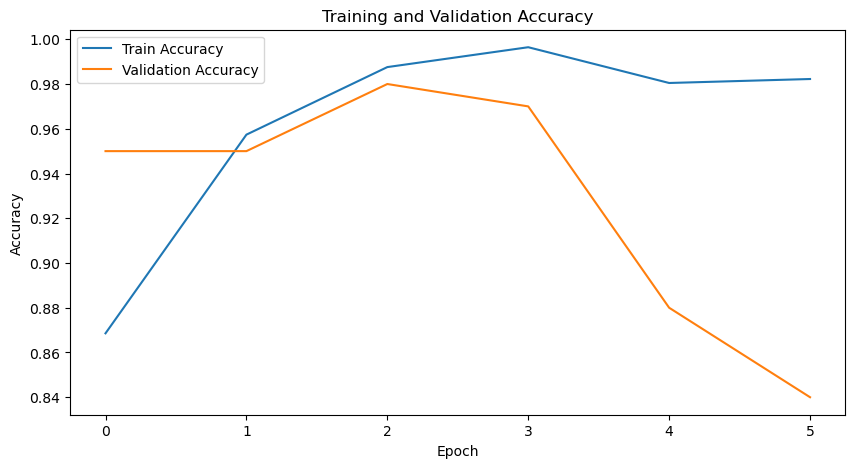

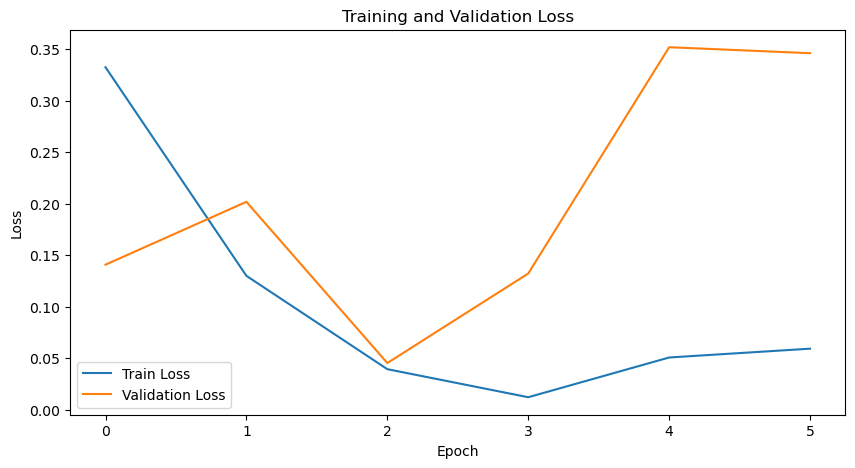

In [17]:
# Plot the training and validation accuracy history
plt.figure(figsize=(10, 5))
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss history
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Report testing accuracy and loss
print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}')

Testing Loss: 0.2935, Testing Accuracy: 0.8803


Confusion Matrix:
[[56 10  0]
 [ 0 31  0]
 [ 4  0 16]]


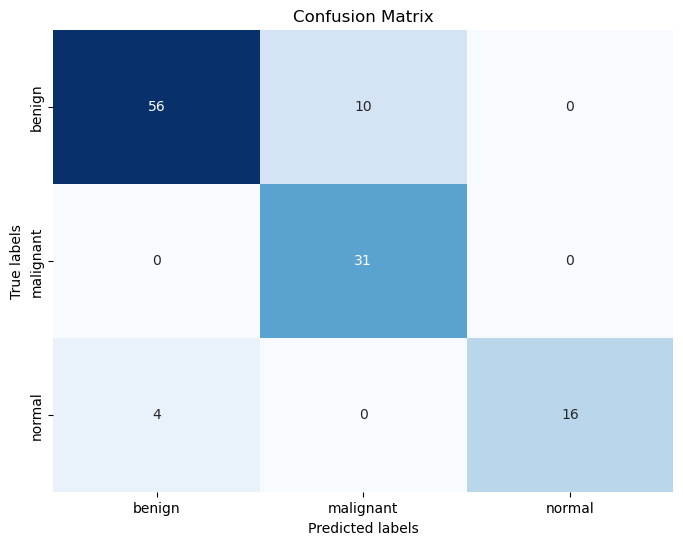

In [19]:
# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

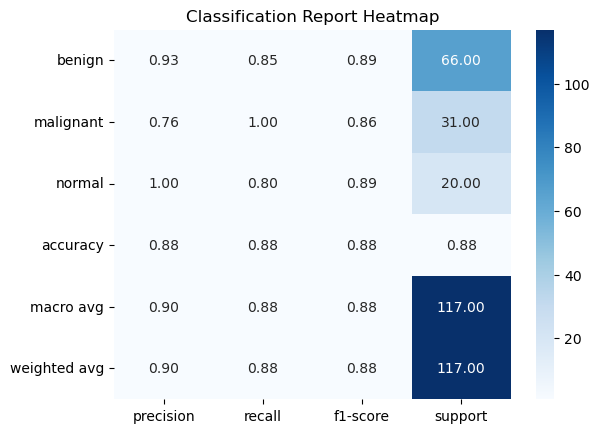

In [20]:
# Plot classification report heatmap
report = classification_report(all_labels, all_predictions, target_names=target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).transpose(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

In [21]:
# Classification report
print(classification_report(all_labels, all_predictions, target_names=target_names))

# Report performance study metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

#print("\nClassification Report Summary:")
#print(pd.DataFrame(report).iloc[:-1, :])

              precision    recall  f1-score   support

      benign       0.93      0.85      0.89        66
   malignant       0.76      1.00      0.86        31
      normal       1.00      0.80      0.89        20

    accuracy                           0.88       117
   macro avg       0.90      0.88      0.88       117
weighted avg       0.90      0.88      0.88       117

Accuracy: 0.8803
Precision: 0.8978
Recall: 0.8803
F1 Score: 0.8815


### Display Classification Result on test data

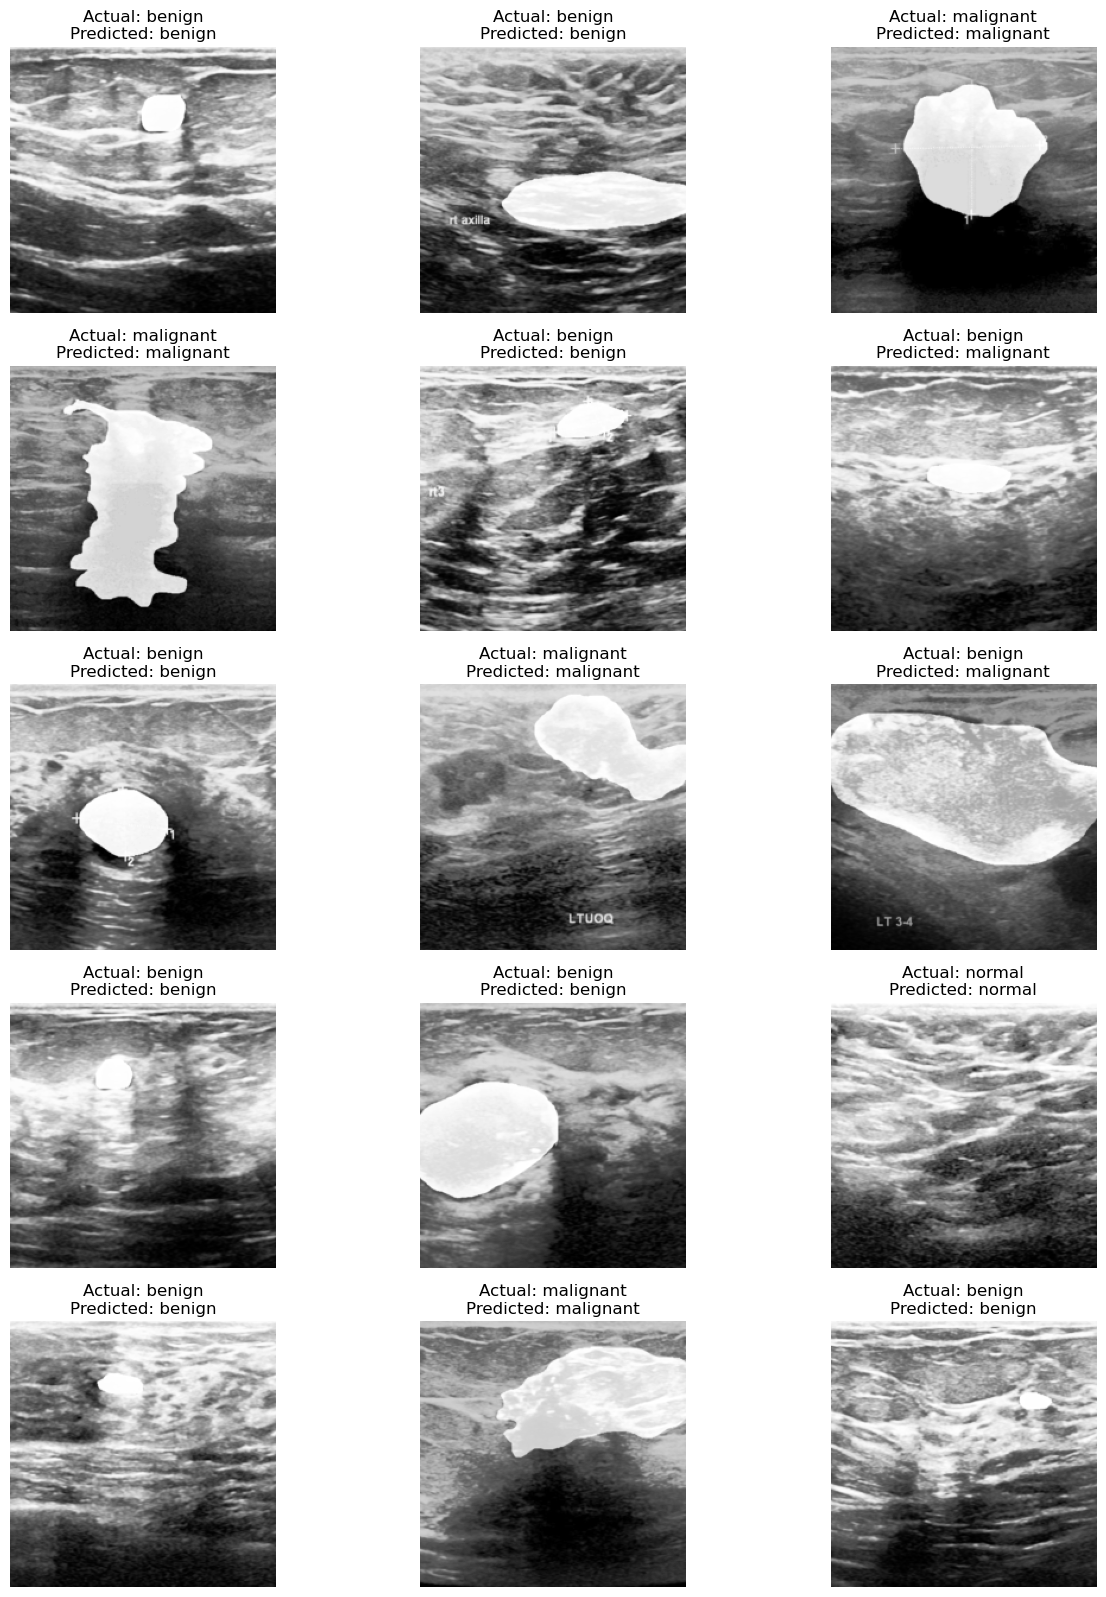

In [22]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set the number of test images to display
num_test_images = 15

# Create a DataLoader for displaying test images
display_test_dataloader = DataLoader(test_dataset, batch_size=num_test_images, shuffle=True)

# Get a batch of test images and labels
inputs, labels = next(iter(display_test_dataloader))
inputs = inputs.to(device)

# Convert RGB images to grayscale
grayscale_images = inputs.cpu().numpy().mean(axis=1)

# Make predictions
with torch.no_grad():
    GoogleNet.eval()
    outputs = GoogleNet(inputs)
    _, preds = torch.max(outputs, 1)

# Plot the test images and predictions
plt.figure(figsize=(15, 20))
for i in range(num_test_images):
    ax = plt.subplot(5, 3, i + 1)
    ax.axis('off')
    ax.set_title(f'Actual: {target_names[labels[i]]}\nPredicted: {target_names[preds[i].item()]}')
    plt.imshow(grayscale_images[i], cmap='gray')

plt.show()


### Summary : In conclusion, the CNN GoogleNet model shows good potential for ultrasound breast cancer classification as stated in the journal. Further fine-tuning and optimization may help improve its overall performance.
